In [1]:
%matplotlib inline
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import umap
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sns.set(style="darkgrid")
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from ipywidgets import interact, IntSlider, fixed, FloatSlider
from sklearn.metrics import silhouette_score

In [2]:
data_set = pd.read_csv('../data/economic_freedom.csv', encoding="ISO-8859-1")
data_set = data_set.drop(["Country", "WEBNAME"], axis=1)

In [3]:
data_set.columns = ['id', 'name', 'region', 'world_rank',
       'region_rank', 'score', 'property_rights', 'judical_effectiveness',
       'gov_integrity', 'tax_burden', 'gov_spending', 'fiscal_health',
       'business_freedom', 'labor_freedom', 'monetary_freedom',
       'trade_freedom', 'investment_freedom ', 'financial_freedom',
       'tariff_rate', 'income_tax_rate', 'corp_tax_rate',
       'tax_burden', 'gov_expenditure',
       'population', 'gdp', 'gdp_growth_rate',
       'five_year_gdp_growth_rate', 'gdp_per_capita',
       'unemployment', 'inflation', 'fdi_inflow',
       'public_debt']

In [4]:
data_set.gdp = data_set.gdp.str[1:]
data_set.fdi_inflow = data_set.fdi_inflow.str[1:]
data_set.gdp_per_capita = data_set.gdp_per_capita.str[1:]
data_set.gdp = data_set.gdp.str.replace(',', '')
data_set.fdi_inflow = data_set.fdi_inflow.str.replace(',', '')
data_set.gdp_per_capita = data_set.gdp_per_capita.str.replace(',', '')

In [5]:
data_set

id         name                        region  world_rank  region_rank  \
0      1  Afghanistan                  Asia-Pacific       152.0         39.0   
1      2      Albania                        Europe        52.0         27.0   
2      3      Algeria  Middle East and North Africa       171.0         14.0   
3      4       Angola            Sub-Saharan Africa       156.0         33.0   
4      5    Argentina                      Americas       148.0         26.0   
..   ...          ...                           ...         ...          ...   
181  179    Venezuela                      Americas       179.0         32.0   
182  180      Vietnam                  Asia-Pacific       128.0         30.0   
183  181        Yemen  Middle East and North Africa         NaN          NaN   
184  182       Zambia            Sub-Saharan Africa       138.0         27.0   
185  183     Zimbabwe            Sub-Saharan Africa       175.0         45.0   

     score  property_rights  judical_effectiveness  gov_integrity  tax_burden  \
0     51.5             19.6                   29.6           25.2        91.7   
1     66.5             54.8                   30.6           40.4        86.3   
2     46.2             31.6                   36.2           28.9        76.4   
3     50.6             35.9                   26.6           20.5        83.9   
4     52.2             47.8                   44.5           33.5        69.3   
..     ...              ...                    ...            ...         ...   
181   25.9              7.6                   13.1            7.9        74.7   
182   55.3             49.8                   40.3           34.0        79.7   
183    NaN             19.6                   22.2           20.3         NaN   
184   53.6             45.0                   35.6           32.3        72.3   
185   40.4             29.7                   24.8           15.8        62.3   

     ...  gov_expenditure  population     gdp  gdp_growth_rate  \
0    ...             25.6        35.5   69.6               2.5   
1    ...             29.5         2.9   36.0               3.9   
2    ...             41.4        41.5  632.9               2.0   
3    ...             25.3        28.2  190.3               0.7   
4    ...             41.0        44.1  920.2               2.9   
..   ...              ...         ...     ...              ...   
181  ...             37.4        31.4  380.7             -14.0   
182  ...             29.4        93.6  647.4               6.8   
183  ...              NaN        30.0   38.6             -13.8   
184  ...             25.8        17.2   68.9               3.6   
185  ...             29.2        14.9   34.0               3.0   

     five_year_gdp_growth_rate  gdp_per_capita  unemployment  inflation  \
0                          2.9            1958           8.8        5.0   
1                          2.5           12507          13.9        2.0   
2                          3.1           15237          10.0        5.6   
3                          2.9            6753           8.2       31.7   
4                          0.7           20876           8.7       25.7   
..                         ...             ...           ...        ...   
181                       -7.8           12114           7.7     1087.5   
182                        6.2            6913           2.1        3.5   
183                      -16.1            1287          14.0        4.9   
184                        4.0            3996           7.8        6.6   
185                        2.6            2283           5.0        1.3   

     fdi_inflow  public_debt  
0           3.9          7.3  
1         119.1         71.2  
2         203.0         25.8  
3        2254.5         65.3  
4        1857.0         52.6  
..          ...          ...  
181        68.0         34.9  
182      4100.0         58.2  
183       269.9        141.0  
184       091.2         62.2  
185        89.4         78.4  

[186 

Нормирование данных по их математическому ожиданию и стандартному отклонению (z-score):

In [6]:
def make_dict(series):
    keys = list(series.value_counts().keys())
    return keys, {keys[i]:i for i in range(len(keys))}

def draw_projections(data, columns):
    fig = plt.figure(figsize=(10, 10))
    proj = '3d' if data.shape[1] == 3 else None
    a = math.ceil(math.sqrt(len(columns)))
    
    for i in range(len(columns)):
        keys, d = make_dict(data_set[columns[i]])
        colors = [sns.color_palette("husl", len(d))[x] for x in data_set[columns[i]].map(d)]
        subplot = fig.add_subplot(int(f'{a}{a}{i + 1}'), projection=proj)
        
        if data.shape[1] == 1:
            subplot.scatter(data[:, 0], c=colors)
        elif data.shape[1] == 2:
            subplot.scatter(data[:, 0], data[:, 1], c=colors)
        elif data.shape[1] == 3:
            subplot.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors) 
            
        subplot.title.set_text(f"UMAP projection by {columns[i]}")
            
        patches = [mpatches.Patch(color=sns.color_palette("hls", len(d))[i], label=keys[i]) for i in range(len(keys))]

        subplot.legend(handles=patches, ncol=10, loc="lower center")

In [7]:
def draw_umap(data, columns, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', draw=True):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        random_state=42
    )
    
    result = fit.fit_transform(data)
    
    if draw:
        draw_projections(result, columns)
        plt.title(f"neighbors = {n_neighbors}, min_dist={min_dist}, components={n_components}, metric={metric}")
    
    return result

Результаты проекции в двумерное пространство с помощью UMAP:

<ipython-input-6-8f08c2d7336c>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 10))


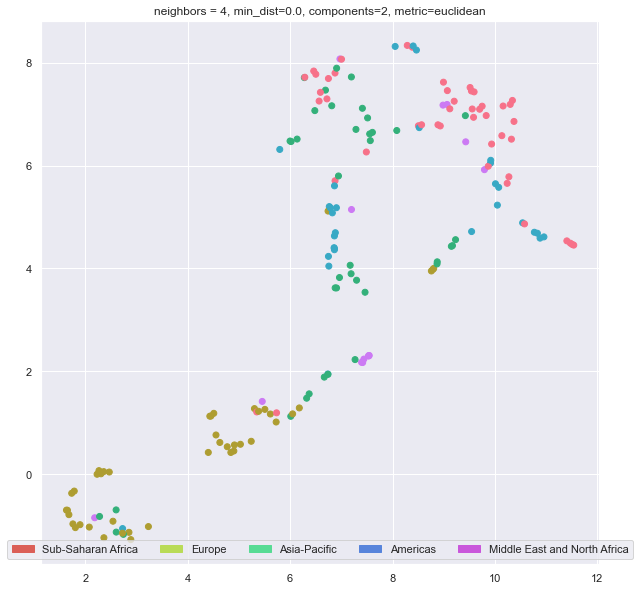

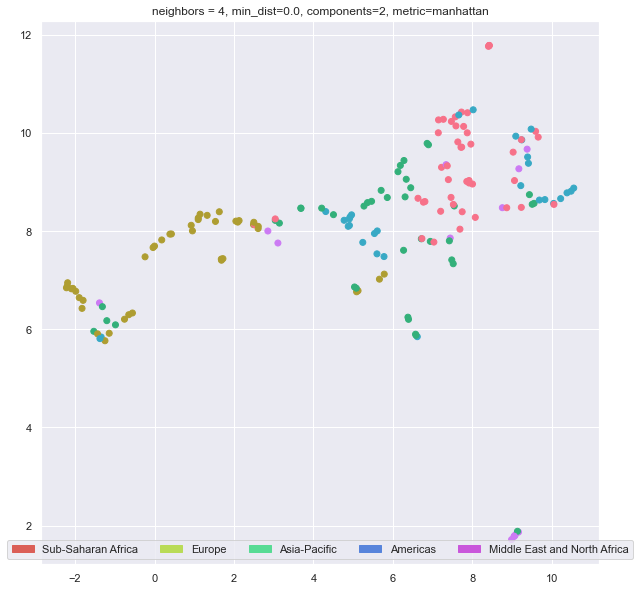

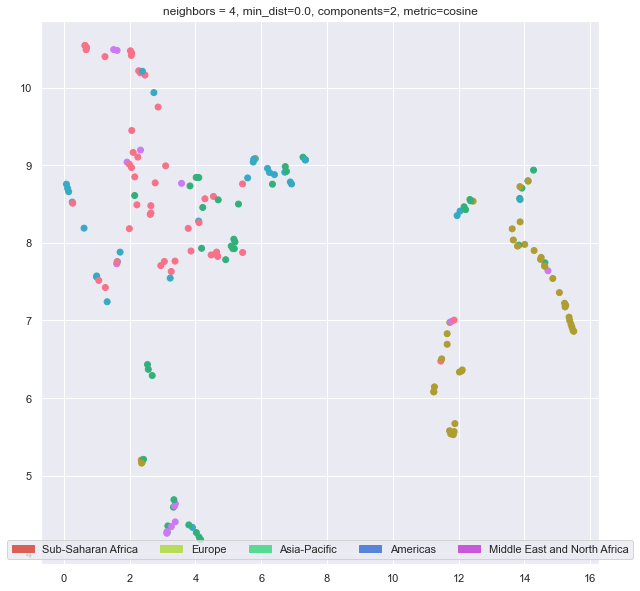

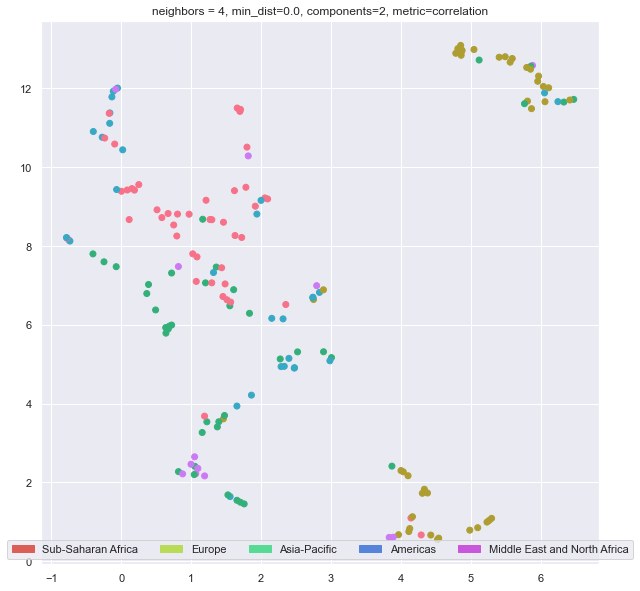

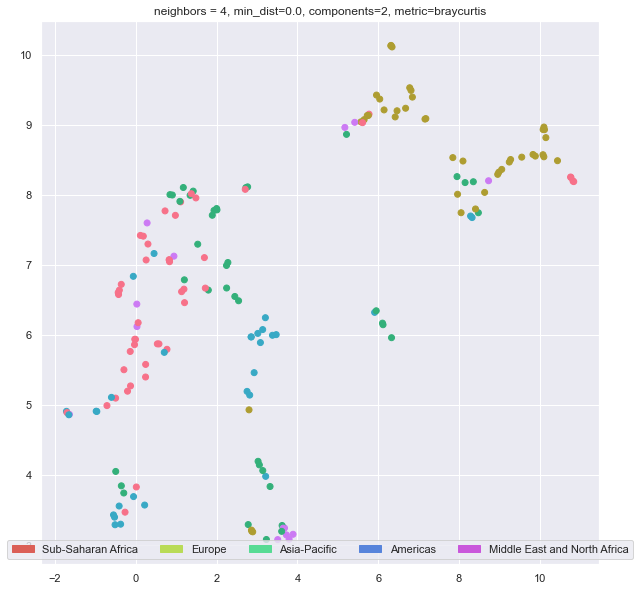

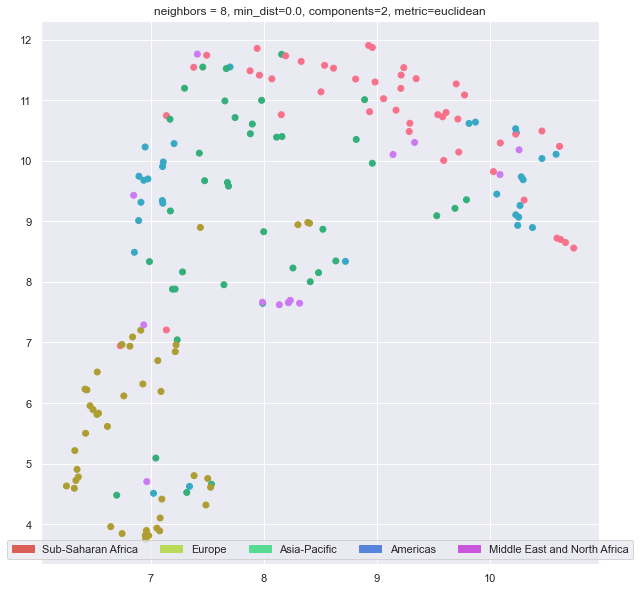

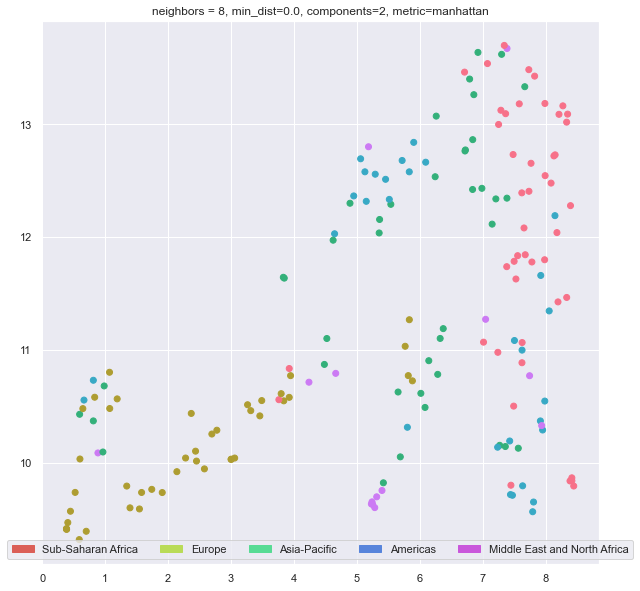

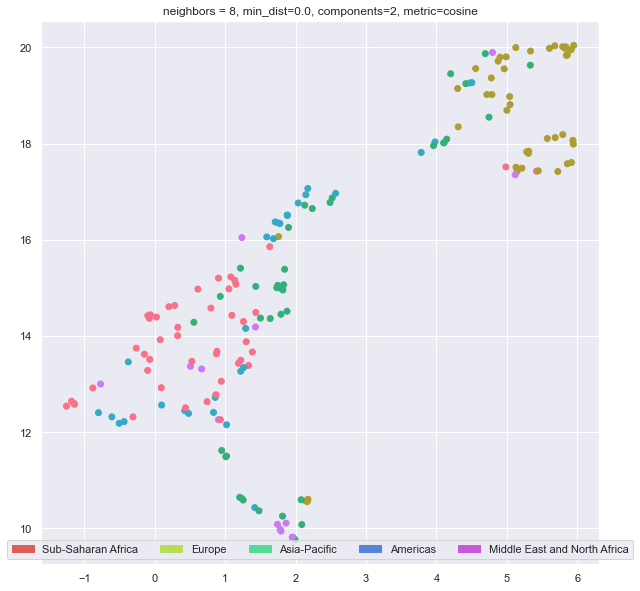

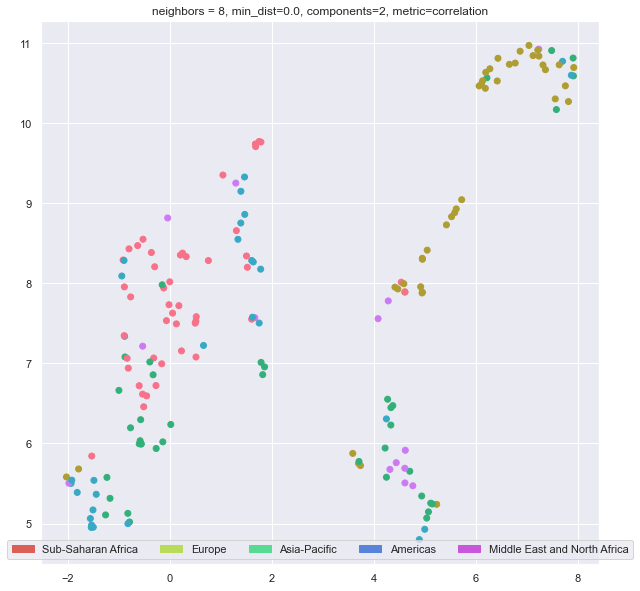

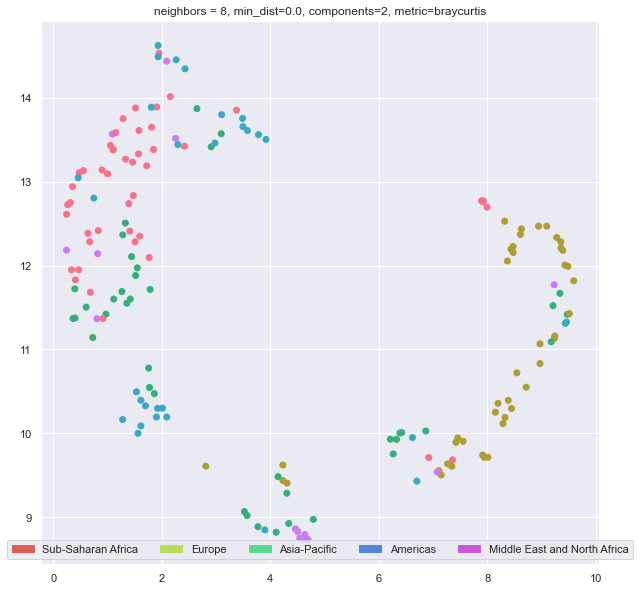

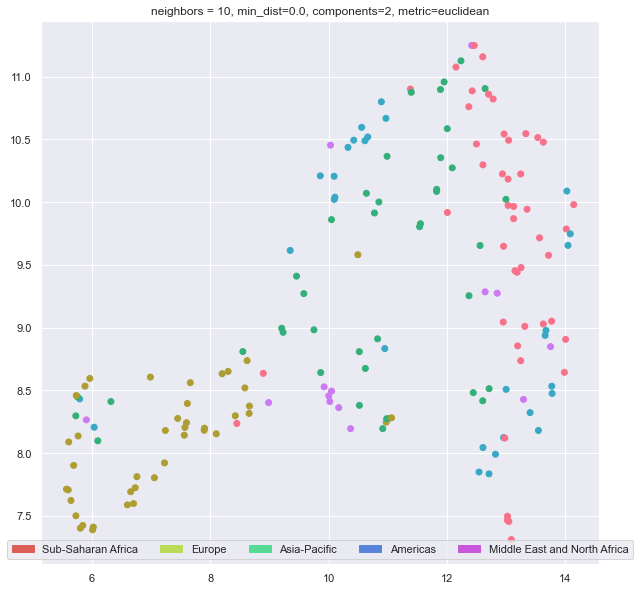

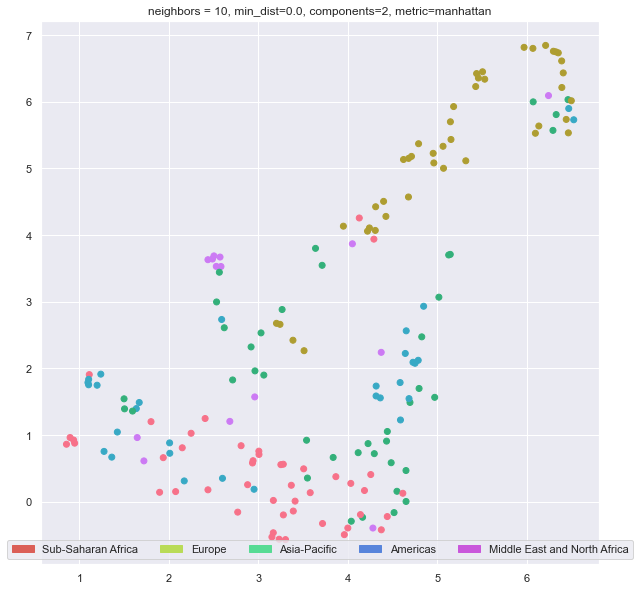

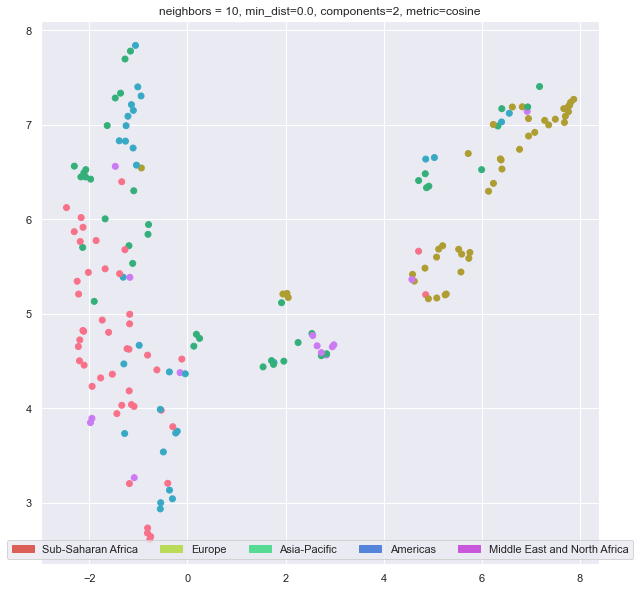

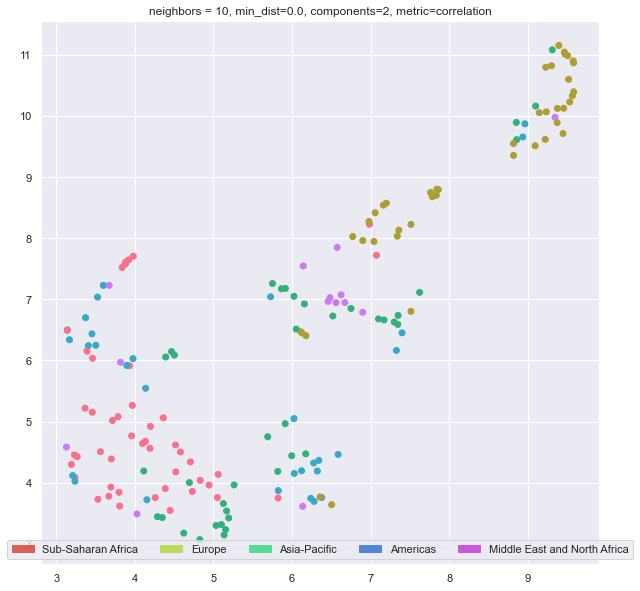

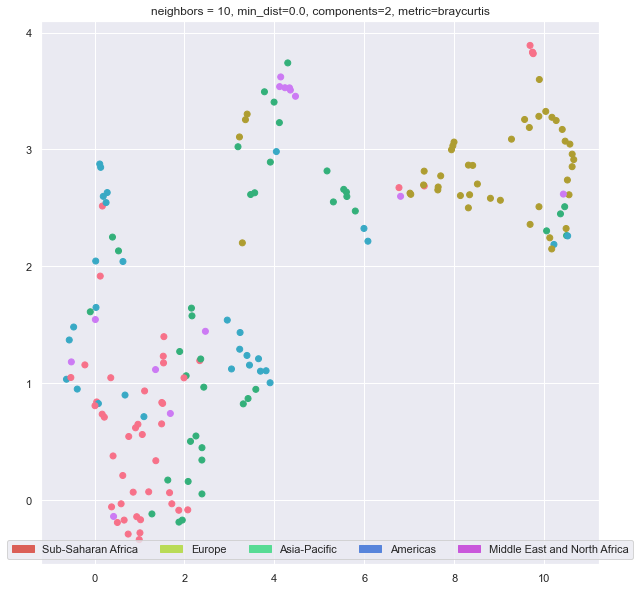

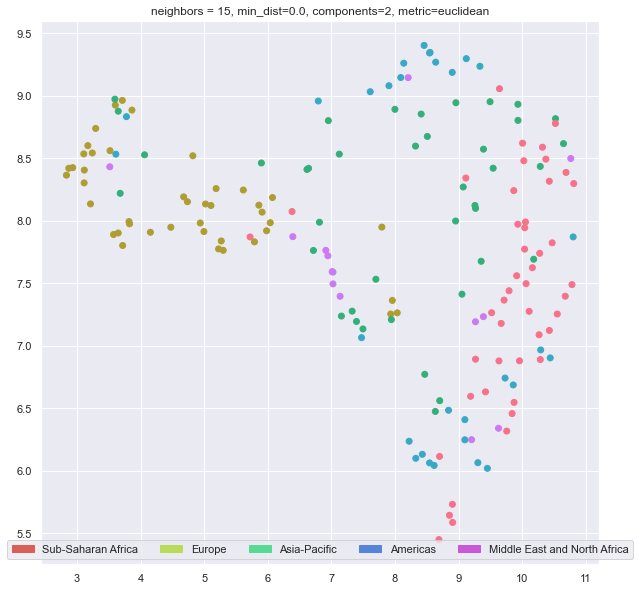

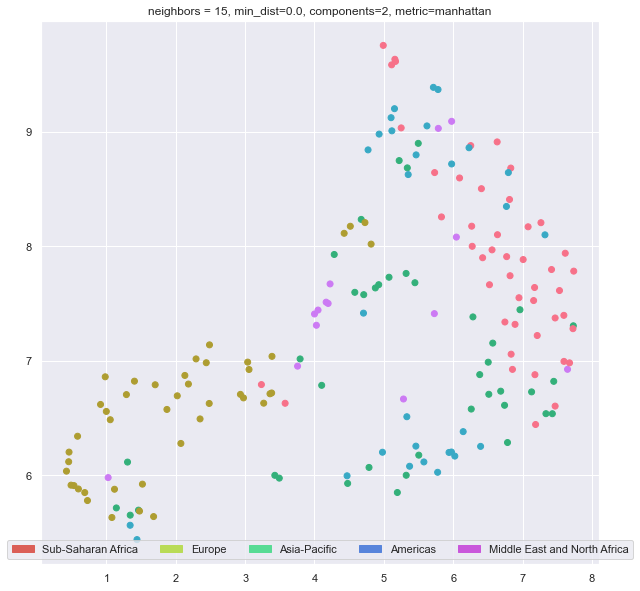

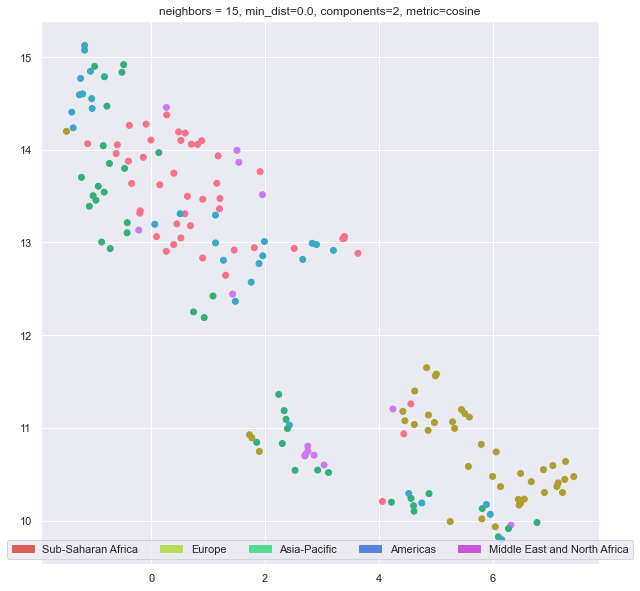

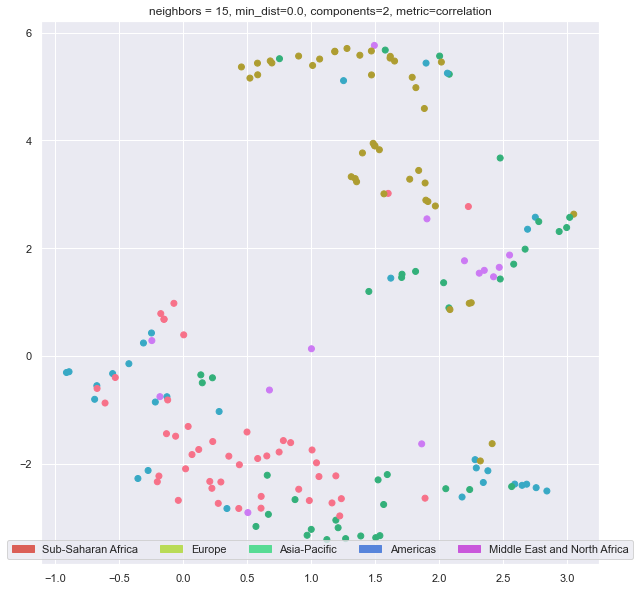

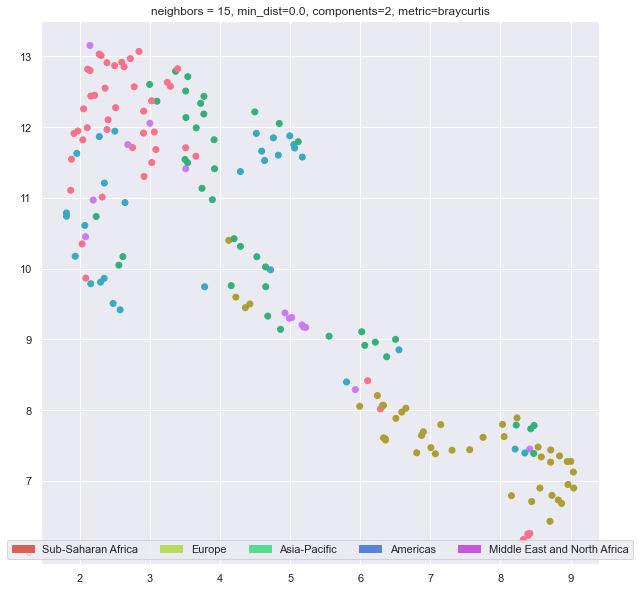

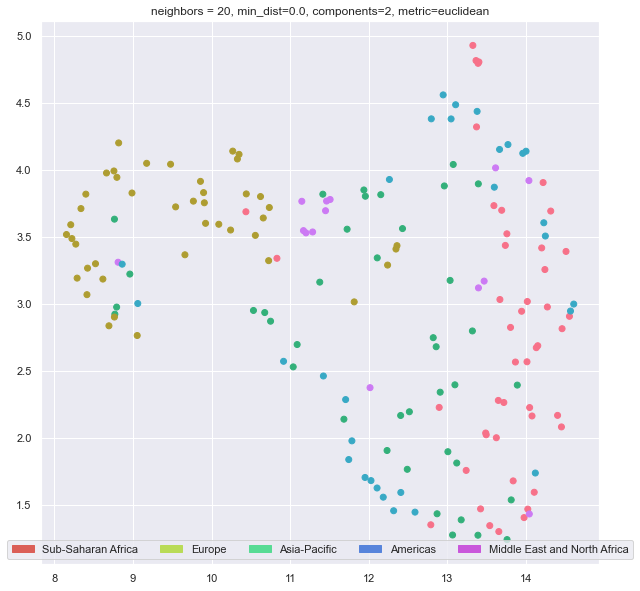

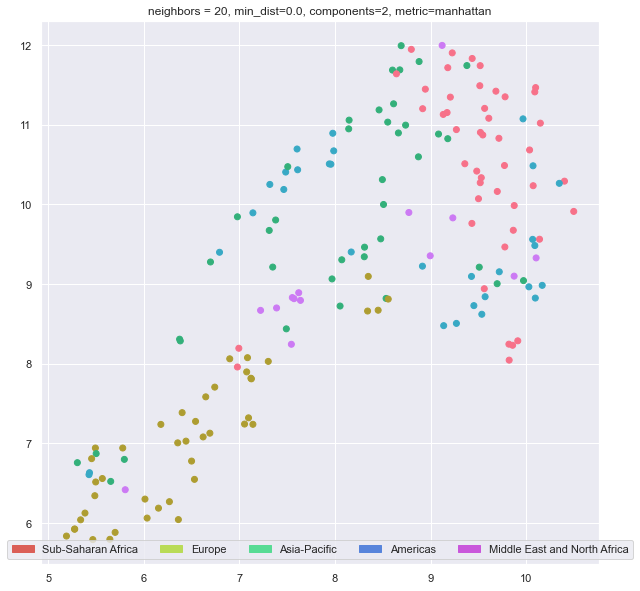

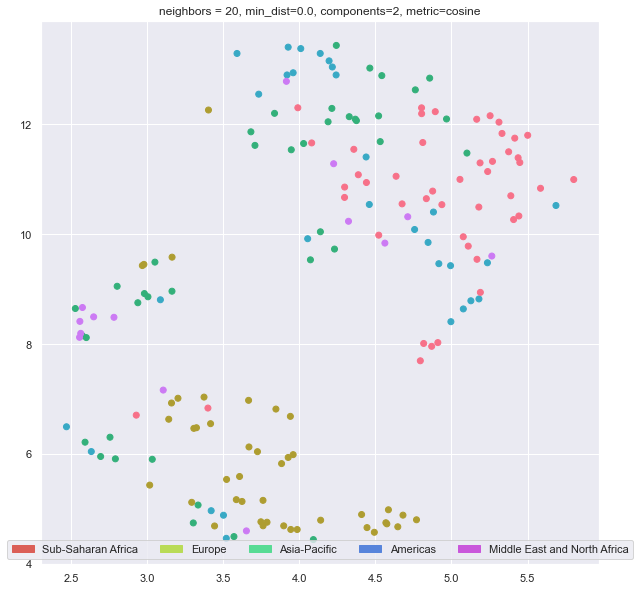

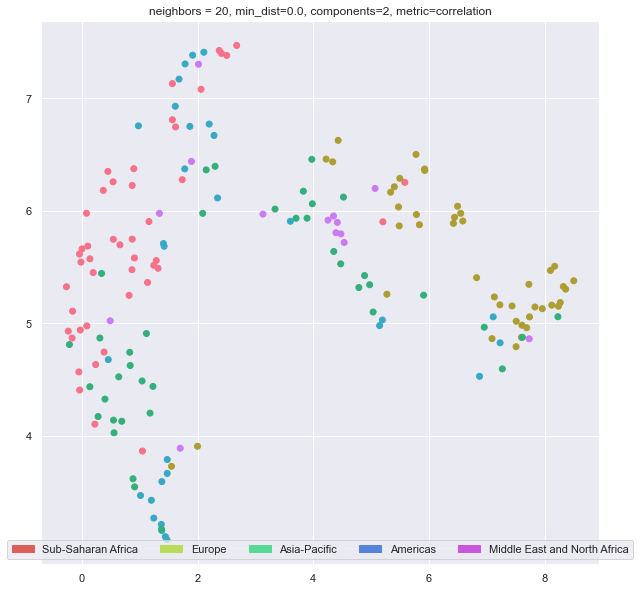

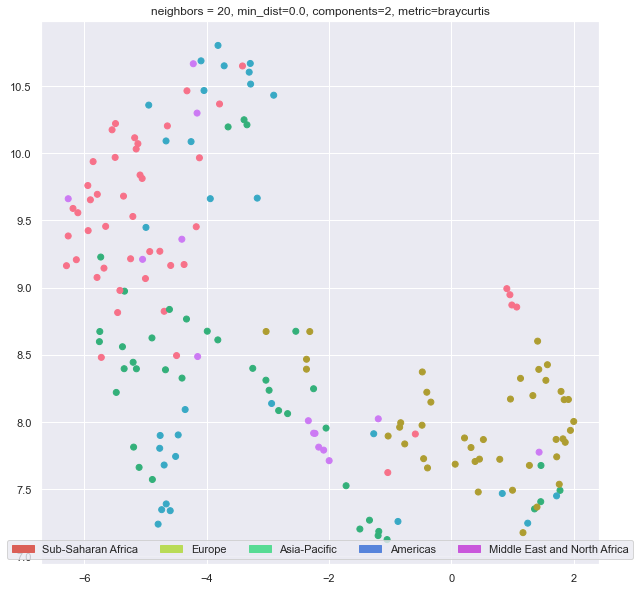

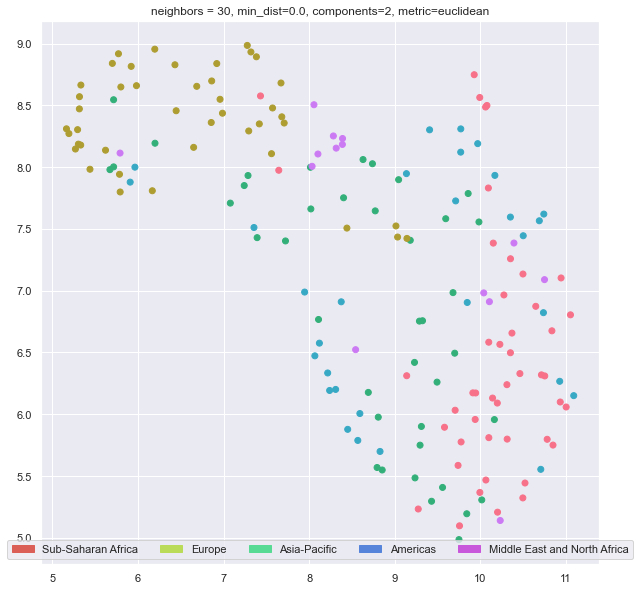

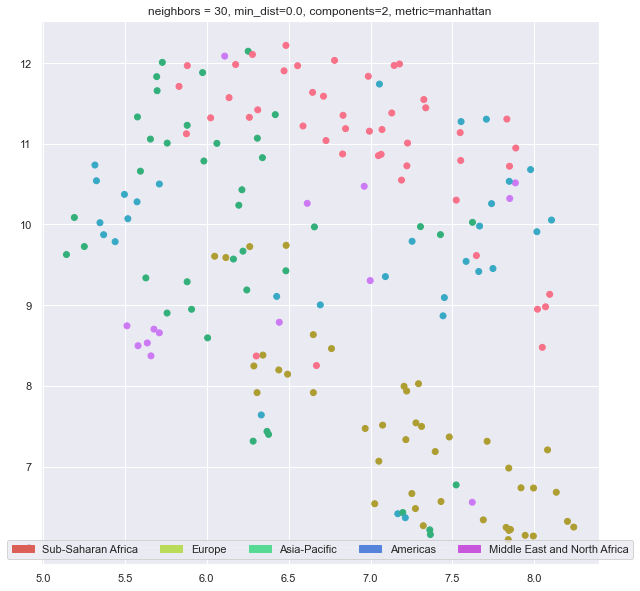

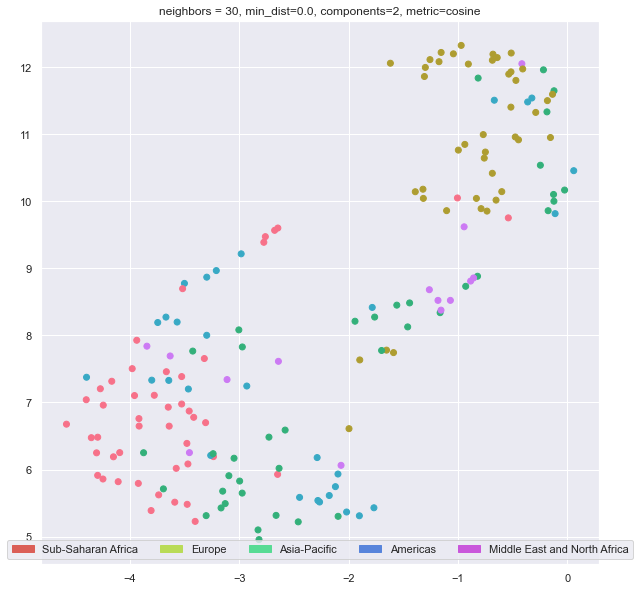

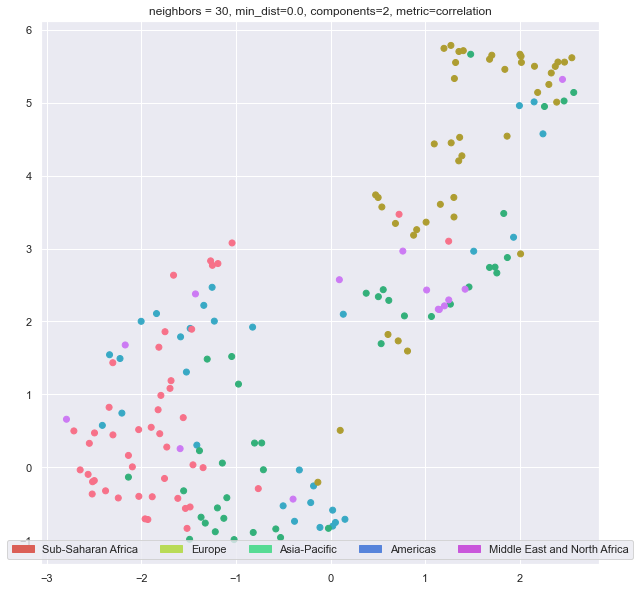

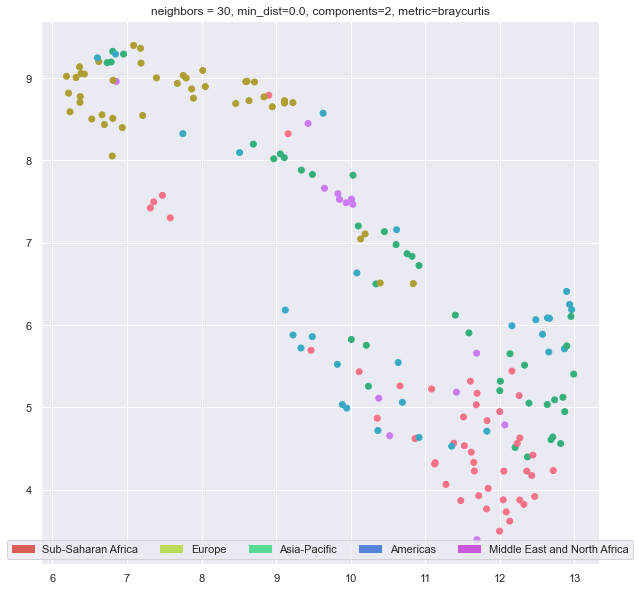

In [8]:
data_set = data_set.dropna()
scaled_data_values = StandardScaler().fit_transform(data_set[['property_rights', 'judical_effectiveness',
       'gov_integrity', 'tax_burden', 'gov_spending', 'fiscal_health',
       'business_freedom', 'labor_freedom', 'monetary_freedom',
       'trade_freedom', 'investment_freedom ', 'financial_freedom',
       'tariff_rate', 'income_tax_rate', 'corp_tax_rate',
       'tax_burden', 'gov_expenditure',
       'population', 'gdp', 'gdp_growth_rate',
       'five_year_gdp_growth_rate', 'gdp_per_capita',
       'unemployment', 'inflation', 'fdi_inflow',
       'public_debt']].values)

for i in [4, 8, 10, 15, 20, 30]:
    draw_umap(scaled_data_values, ["region"], n_neighbors=i, min_dist=0.0, n_components=2, metric='euclidean')
    draw_umap(scaled_data_values, ["region"], n_neighbors=i, min_dist=0.0, n_components=2, metric='manhattan')
    draw_umap(scaled_data_values, ["region"], n_neighbors=i, min_dist=0.0, n_components=2, metric='cosine')
    draw_umap(scaled_data_values, ["region"], n_neighbors=i, min_dist=0.0, n_components=2, metric='correlation')
    draw_umap(scaled_data_values, ["region"], n_neighbors=i, min_dist=0.0, n_components=2, metric='braycurtis')

In [9]:
data_values = data_set[['property_rights', 'judical_effectiveness',
       'gov_integrity', 'tax_burden', 'gov_spending', 'fiscal_health',
       'business_freedom', 'labor_freedom', 'monetary_freedom',
       'trade_freedom', 'investment_freedom ', 'financial_freedom',
       'tariff_rate', 'income_tax_rate', 'corp_tax_rate',
       'tax_burden', 'gov_expenditure',
       'population', 'gdp', 'gdp_growth_rate',
       'five_year_gdp_growth_rate', 'gdp_per_capita',
       'unemployment', 'inflation', 'fdi_inflow',
       'public_debt']]
data_values

property_rights  judical_effectiveness  gov_integrity  tax_burden  \
0               19.6                   29.6           25.2        91.7   
1               54.8                   30.6           40.4        86.3   
2               31.6                   36.2           28.9        76.4   
3               35.9                   26.6           20.5        83.9   
4               47.8                   44.5           33.5        69.3   
..               ...                    ...            ...         ...   
180             65.9                   36.4           51.9        97.3   
181              7.6                   13.1            7.9        74.7   
182             49.8                   40.3           34.0        79.7   
184             45.0                   35.6           32.3        72.3   
185             29.7                   24.8           15.8        62.3   

     tax_burden  gov_spending  fiscal_health  business_freedom  labor_freedom  \
0           5.0          80.3           99.3              49.2           60.4   
1          24.9          73.9           80.6              69.3           52.7   
2          24.5          48.7           18.7              61.6           49.9   
3          20.6          80.7           58.2              55.7           58.8   
4          30.8          49.5           33.0              56.4           46.9   
..          ...           ...            ...               ...            ...   
180        16.3          54.1           15.3              52.4           58.8   
181        14.9          58.1           17.6              33.9           28.0   
182        18.0          74.1           40.7              63.5           62.8   
184        17.9          80.1           12.3              71.1           46.0   
185        22.3          74.5           23.7              33.4           43.3   

     monetary_freedom  ...  gov_expenditure  population     gdp  \
0                76.7  ...             25.6        35.5   69.6    
1                81.5  ...             29.5         2.9   36.0    
2                74.9  ...             41.4        41.5  632.9    
3                55.4  ...             25.3        28.2  190.3    
4                60.2  ...             41.0        44.1  920.2    
..                ...  ...              ...         ...     ...   
180              75.0  ...             39.1         0.3    0.8    
181               0.0  ...             37.4        31.4  380.7    
182              68.9  ...             29.4        93.6  647.4    
184              70.3  ...             25.8        17.2   68.9    
185              72.4  ...             29.2        14.9   34.0    

     gdp_growth_rate  five_year_gdp_growth_rate  gdp_per_capita  unemployment  \
0                2.5                        2.9            1958           8.8   
1                3.9                        2.5           12507          13.9   
2                2.0                        3.1           15237          10.0   
3                0.7                        2.9            6753           8.2   
4                2.9                        0.7           20876           8.7   
..               ...                        ...             ...           ...   
180              4.2                        2.4            2739           5.2   
181            -14.0                       -7.8           12114           7.7   
182              6.8                        6.2            6913           2.1   
184              3.6                        4.0            3996           7.8   
185              3.0                        2.6            2283           5.0   

     inflation  fdi_inflow public_debt  
0          5.0         3.9         7.3  
1          2.0       119.1        71.2  
2          5.6       203.0        25.8  
3         31.7      2254.5        65.3  
4         25.7      1857.0        52.6  
..         ...         ...         ...  
180        3.1         4.7        48.4  
181     1087.5        68.0        34.

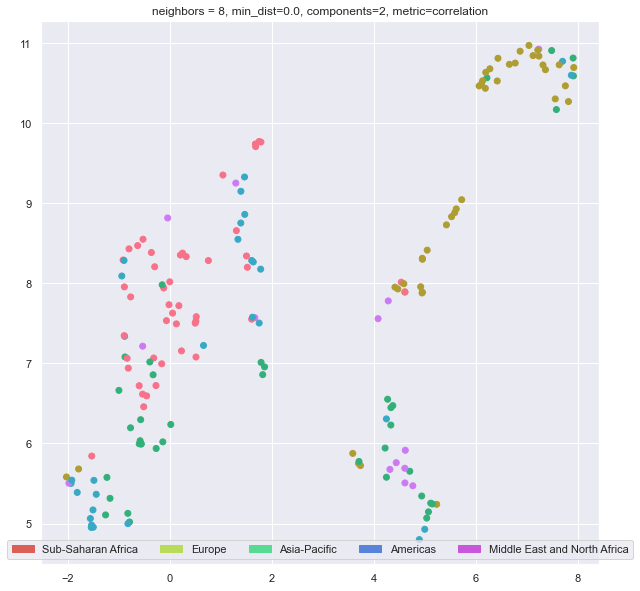

In [10]:
    projection = draw_umap(scaled_data_values, ["region"], n_neighbors=8, 
                       min_dist=0.0, n_components=2, metric='correlation')

In [11]:
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 10)

In [12]:
def draw_kmeans(n=2):
    kmeans = KMeans(n_clusters=n).fit(projection)

    fig, ax = plt.subplots(1,1)
    ax.scatter(projection[:,0], projection[:,1], c=kmeans.labels_)
    
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                  marker='o', c="white", alpha=1, s=200)
    
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    for i, c in enumerate(kmeans.cluster_centers_):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
    plt.show()
    
interact(draw_kmeans, n=IntSlider(min=2,max=12,step=1,value=2));

interactive(children=(IntSlider(value=2, description='n', max=12, min=2), Output()), _dom_classes=('widget-int…

In [13]:
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 8)

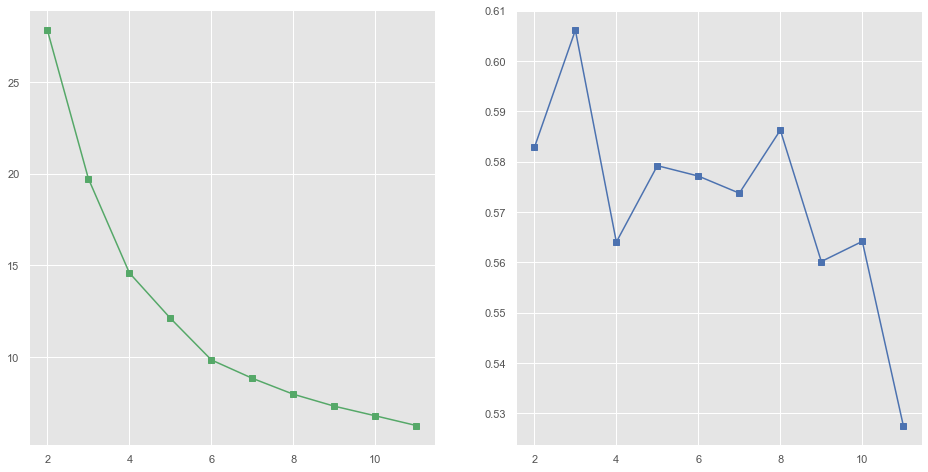

In [14]:
elbow = []
silhouette = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20).fit(projection)
    elbow.append(np.sqrt(kmeans.inertia_))
    silhouette.append(silhouette_score(projection, kmeans.labels_))
    
fig, ax = plt.subplots(1, 2)
    
ax[0].plot(range(2,12), elbow, marker='s', c='g')
ax[1].plot(range(2,12), silhouette, marker='s', c='b')

plt.show()

In [15]:
def draw_dbscan(eps=1, min_pts=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_pts).fit(projection)

    fig, ax = plt.subplots(1,1)
    ax.scatter(projection[:,0], projection[:,1], c=dbscan.labels_)
    
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    plt.show()
    
    clusters = set(dbscan.labels_)
    
interact(draw_dbscan, eps=FloatSlider(min=0.1, max=3, step=0.05, value=1), min_pts=IntSlider(min=2, max=15, step=1, value=5));

interactive(children=(FloatSlider(value=1.0, description='eps', max=3.0, min=0.1, step=0.05), IntSlider(value=…

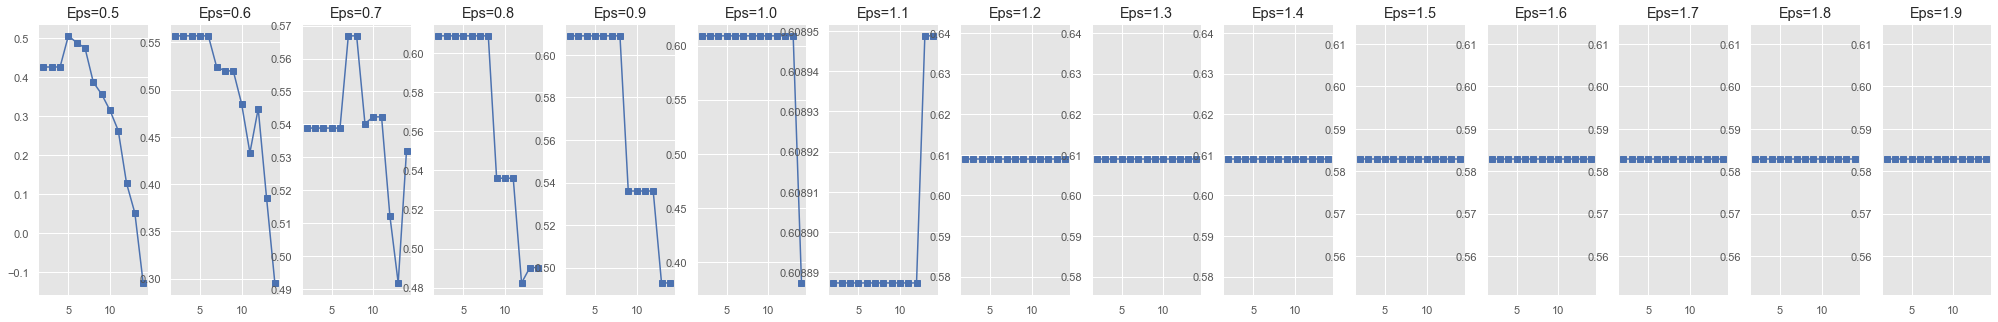

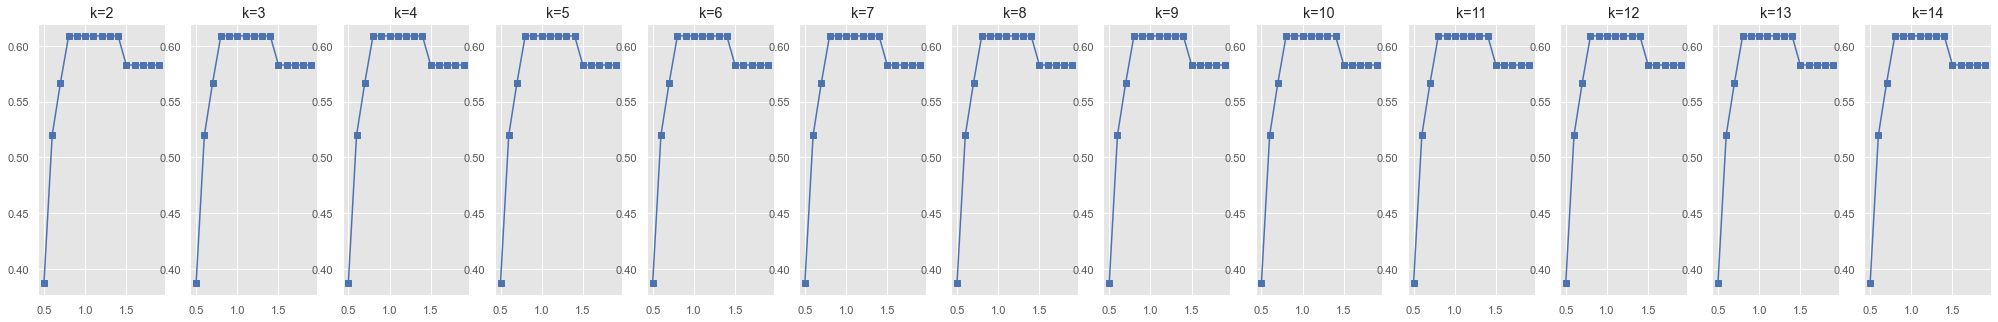

In [59]:
import decimal

silhouette1 = []
silhouette2 = []

eps_range = [x / 100.0 for x in range(50, 200, 10)]
k_range = range(2, 15)

for e in eps_range:
    silhouette = []

    for k in k_range:
        dbscan = DBSCAN(eps=e, min_samples=k).fit(projection)
        silhouette.append(silhouette_score(projection, dbscan.labels_))

    silhouette1.append((silhouette, e))

for k in k_range:
    silhouette = []

    for e in eps_range:
        dbscan = DBSCAN(eps=e, min_samples=8).fit(projection)
        silhouette.append(silhouette_score(projection, dbscan.labels_))
    
    silhouette2.append((silhouette, k))

fig1, ax1 = plt.subplots(1, len(silhouette1), figsize=(35, 5))
fig2, ax2 = plt.subplots(1, len(silhouette2), figsize=(35, 5))
for i in range(len(silhouette1)):
    ax1[i].plot(k_range, silhouette1[i][0], marker='s', c='b')
    ax1[i].set_title(f"Eps={silhouette1[i][1]}")

for i in range(len(silhouette2)):
    ax2[i].plot(eps_range, silhouette2[i][0], marker='s', c='b')
    ax2[i].set_title(f"k={silhouette2[i][1]}")

plt.show()